In [1]:
import cv2
import tensorflow as tf
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
CATEGORIES = ['Dog', 'Cat']
model = tf.keras.models.load_model('catdog_85.model')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 25)        10025     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 25)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 36)        22536     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 9, 9, 36)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 49)          44149     
__________

In [3]:
def predict(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    prediction = model.predict([new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)])
    print('This is an image of a:' + ' ' + CATEGORIES[int(prediction[0][0])])
    plt.imshow(new_array, cmap='gray')

def prepare(filepath):
    IMG_SIZE = 100
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE,IMG_SIZE))
    return([new_array.reshape(-1, IMG_SIZE,IMG_SIZE,1)])

def plot_conv_weights(weights, input_channel=0):
    w_min = np.min(weights)
    w_max = np.max(weights)
    num_filters = weights.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = weights[:, :, input_channel, i]
            ax.imshow(img, vmin=w_min, vmax=w_max,
                      interpolation='nearest', cmap='seismic')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
    
def plot_conv_output(values):
    num_filters = values.shape[3]
    num_grids = math.ceil(math.sqrt(num_filters))
    fig, axes = plt.subplots(num_grids, num_grids)
    for i, ax in enumerate(axes.flat):
        if i<num_filters:
            img = values[0, :, :, i]
            ax.imshow(img, interpolation='nearest', cmap='binary')
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

This is an image of a: Dog


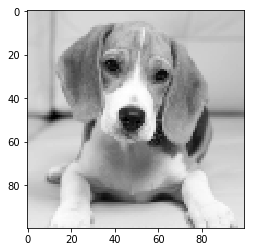

In [4]:
predict('dog.jpg')

This is an image of a: Cat


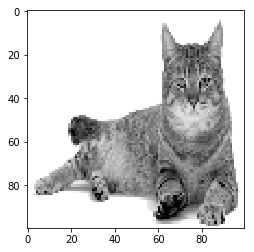

In [5]:
predict('cat.jpg')

In [6]:
layer_conv1 = model.layers[0]
layer_conv2 = model.layers[2]
layer_conv3 = model.layers[4]
layer_conv4 = model.layers[6]

In [7]:
weights_conv1 = layer_conv1.get_weights()[0]
weights_conv2 = layer_conv2.get_weights()[0]
weights_conv3 = layer_conv3.get_weights()[0]
weights_conv4 = layer_conv4.get_weights()[0]

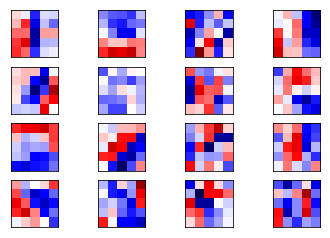

In [8]:
plot_conv_weights(weights=weights_conv1, input_channel=0)

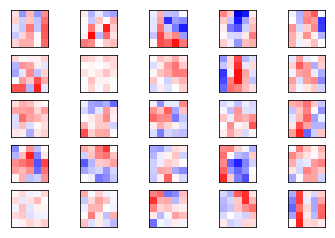

In [9]:
plot_conv_weights(weights=weights_conv2, input_channel=0)

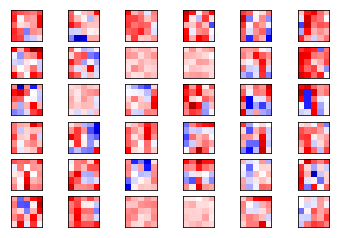

In [10]:
plot_conv_weights(weights=weights_conv3, input_channel=0)

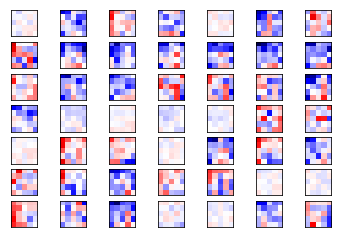

In [11]:
plot_conv_weights(weights=weights_conv4, input_channel=0)

In [12]:
output_conv1 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv1.output)
output_conv2 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv2.output)
output_conv3 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv3.output)
output_conv4 = tf.keras.Model(inputs=layer_conv1.input, outputs=layer_conv4.output)

In [13]:
layer_output1 = output_conv1.predict(prepare('dog.jpg'))
layer_output2 = output_conv2.predict(prepare('dog.jpg'))
layer_output3 = output_conv3.predict(prepare('dog.jpg'))
layer_output4 = output_conv4.predict(prepare('dog.jpg'))

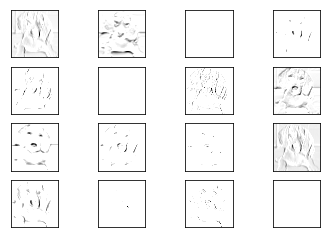

In [14]:
plot_conv_output(values=layer_output1)

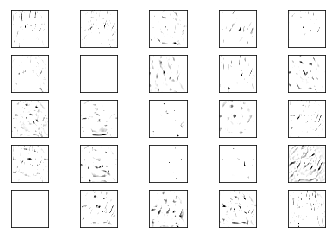

In [15]:
plot_conv_output(values=layer_output2)

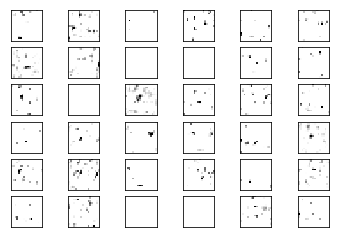

In [16]:
plot_conv_output(values=layer_output3)

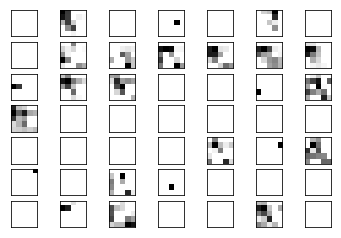

In [17]:
plot_conv_output(values=layer_output4)